In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
merged_data = transactions.merge(customers, on='CustomerID')

In [4]:
merged_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00761,C0199,P022,2024-10-01 05:57:09,4,550.16,137.54,Andrea Jenkins,Europe,2022-12-03
2,T00626,C0199,P079,2024-08-17 12:06:08,2,834.74,417.37,Andrea Jenkins,Europe,2022-12-03
3,T00963,C0199,P008,2024-10-26 00:01:58,2,293.70,146.85,Andrea Jenkins,Europe,2022-12-03
4,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
...,...,...,...,...,...,...,...,...,...,...
995,T00774,C0095,P056,2024-01-07 14:19:49,2,32.16,16.08,William Walker,South America,2023-03-04
996,T00823,C0095,P079,2024-09-30 10:45:06,3,1252.11,417.37,William Walker,South America,2023-03-04
997,T00369,C0151,P082,2024-12-24 11:40:24,4,223.96,55.99,Amber Gonzalez,South America,2024-11-22
998,T00809,C0078,P075,2024-12-09 11:44:44,2,995.52,497.76,Julia Palmer,Asia,2024-11-13


In [5]:
customer_features = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum','TransactionID': 'count','Price': 'mean'
}).rename(columns={
    'TotalValue': 'TotalSpend','TransactionID': 'TransactionCount','Price': 'AvgTransactionValue'
})

In [6]:
customer_features = customer_features.merge(customers[['CustomerID', 'Region']], on='CustomerID')
customer_features.head()

,CustomerID,TotalSpend,TransactionCount,AvgTransactionValue,Region
0,C0001,3354.52,5,278.334000,South America
1,C0002,1862.74,4,208.920000,Asia
2,C0003,2725.38,4,195.707500,South America
3,C0004,5354.88,8,240.636250,South America
4,C0005,2034.24,3,291.603333,Asia


In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
customer_features['Region'] = encoder.fit_transform(customer_features['Region'])

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(customer_features[['TotalSpend', 'TransactionCount', 'AvgTransactionValue', 'Region']])

In [9]:
from sklearn.cluster import KMeans

inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

inertia

[549.8594156481026,
 448.82470667364373,
 361.25315421531803,
 312.8821728522496,
 271.57701924314665,
 245.2922748462384,
 224.36787701002683,
 210.55400346016887,
 194.13081271054136]

Text(0, 0.5, 'Inertia')

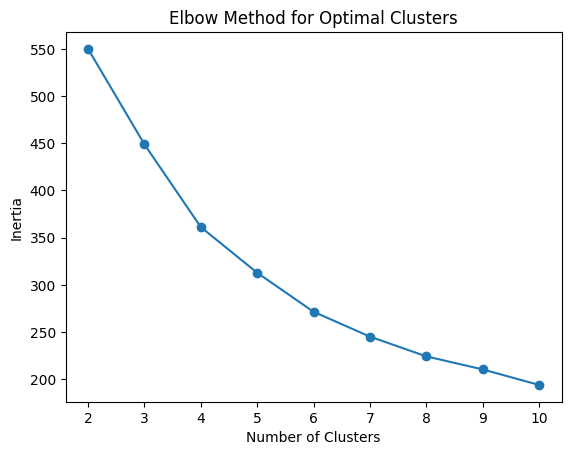

In [10]:
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [11]:
kmeans = KMeans(n_clusters=4, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(features_scaled)

In [12]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(features_scaled, customer_features['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.2262415131576336


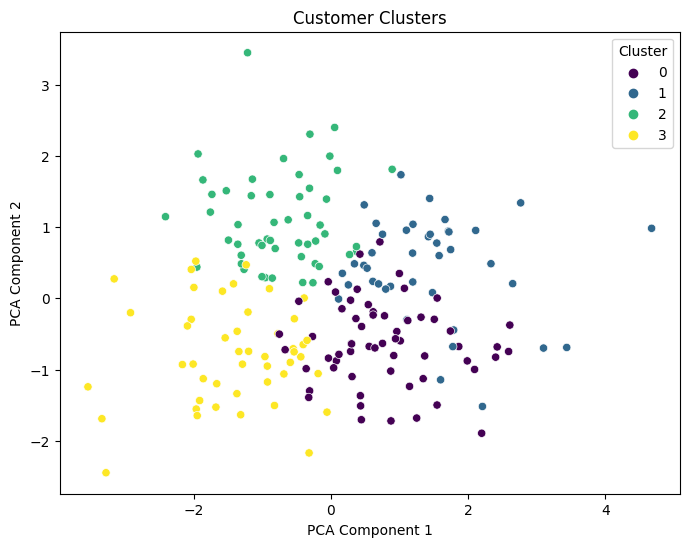

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=customer_features['Cluster'], palette='viridis')
plt.title('Customer Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')